In [ ]:
import numpy as np
from matplotlib import pyplot as plt 


N = 128 
f = 2 
a = 1 
t = np.arange(N)/N

phase = 0 * (2*np.pi/360)
signal = a * np.sin( 2*np.pi*t*f + phase)
plt.plot(t, signal, lw=3)

phase = 90 * (2*np.pi/360)
signal = a * np.sin( 2*np.pi*t*f + phase)
plt.plot(t, signal, lw=3)

phase = -90 * (2*np.pi/360)
signal = a * np.sin( 2*np.pi*t*f + phase)
plt.plot(t, signal, lw=3)

plt.grid()

In [ ]:
# s_n = sum_m a_m sin( 2 pi f_m t + phase )

def create_signal(amp, freq, phase, t): 
    signal = 0
    for n in range(len(amp)):
        signal += amp[n] * np.sin( 2*np.pi*t*freq[n] + phase[n]*(2*np.pi/360))

    return signal 

sample_rate = 512 
N = 128
t = np.arange(N)/sample_rate

M = 2
a = np.random.rand(M)
a = a/a.sum()
f = 20 + np.random.rand(M)*980
phase = (np.random.rand(M)-1/2)*360

sig = create_signal(a,f,phase,t)
c = 4
t2 = np.arange(N*c)/(sample_rate*c)
sig2 = create_signal(a,f,phase,t2)

plt.figure(figsize=(8,4))

plt.plot(t2,sig2,lw=3, label="good sampling")
plt.plot(t,sig,lw=3, label="bad sampling")
plt.legend()
plt.grid()





In [ ]:
from numpy.fft import fft, fftshift, ifft 

sample_rate = 512 
N = 256
t = np.arange(N)/sample_rate

M = 2
a = np.random.rand(M)
a = a/a.sum()
f = [80,84.22754194] # 20 + np.random.rand(M)*128
phase = (np.random.rand(M)-1/2)*360 *0

sig = create_signal(a,f,phase,t)

Nfft = 8*N
TF = fft(sig, Nfft) / N

Spectre = np.abs(TF)**2

frequences = (np.arange(len(Spectre))/len(Spectre)) * (sample_rate)

print((a/2)**2,f)

plt.plot(frequences, (Spectre),'s-', lw=3)
plt.plot(f,(a/2)**2,'or')
plt.xlim((60,100))
plt.grid()

In [ ]:
N = 512 

delta = np.zeros(N)
delta[150+N//2]=1

porte = np.zeros(N)
porte[N//2-50:N//2+50] = 1 

t = np.arange(N)-N/2

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(t,delta,lw=3, label="delta")
plt.plot(t,porte,lw=3, label="porte")
plt.grid()
plt.legend()

convolution = fftshift(np.real( ifft( fft(delta) * fft(porte))  ))

plt.subplot(122)
plt.plot(t,convolution,lw=3, label="porte conv porte")
plt.plot(t,delta,lw=3, label="delta")
plt.grid()

In [133]:
import librosa
import sounddevice as sd
from os.path import join 
from os import listdir

path_reverb = "Imreverbs"



filename = 'cat_10.wav'

y, Fs = librosa.load(filename)
y = y[Fs:int(5.45*Fs)]

sd.play(y, Fs)

In [ ]:
plt.plot(y)

In [ ]:
N = len(y)
echo = np.zeros(N)
echo[0] = 1 
delay = 10000
echo[delay] = .75
echo[delay*2] = .5
echo[delay*3] = .25


plt.plot(echo)
plt.title(delay/Fs)

In [ ]:

convolution = np.real( ifft( fft(y) * fft(echo) ) ) 

plt.plot(y)
plt.plot(convolution, alpha=.5)


In [ ]:
sd.play(convolution, Fs)


(98122,)

(0.0, 11025.0)

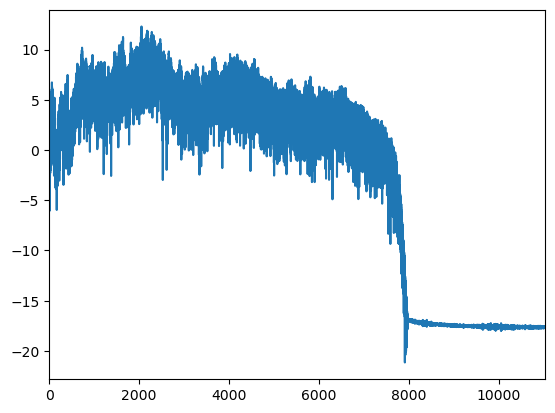

In [138]:
TF = np.log(np.abs(fft(y))**2)
f = np.arange(len(TF)) *Fs/len(TF)
plt.plot(f, TF)
plt.xlim((0,Fs//2))

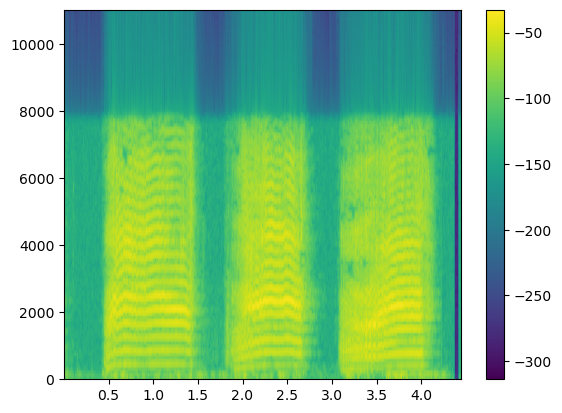

In [139]:

plt.specgram(y, Fs=Fs)
plt.colorbar()

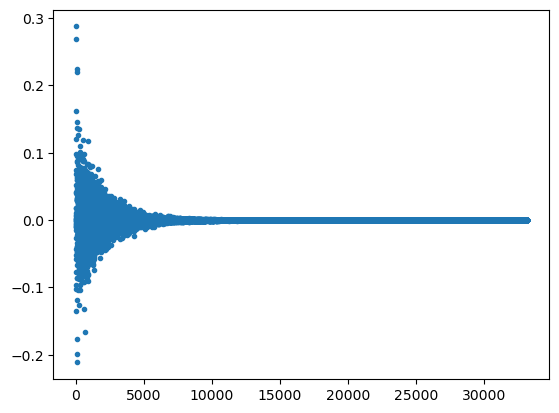

In [147]:
files = listdir(path_reverb)
reverb,_ = librosa.load(join(path_reverb,files[18]))

plt.plot(reverb,'.')

Nfft = np.maximum(len(y),len(reverb))

convolution = np.real( ifft( fft(y,Nfft) * fft(reverb,Nfft) ) ) 
sd.play(convolution, Fs)